<a href="https://colab.research.google.com/github/GITHUBSILPA/Capstone_data/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ML PROBLEM

In [ ]:
#TASK : The motive here is to build a credit risk scorecard for affordable home loan applicants and help in approving / declining customer applications based on the same.
#Hence the model should provide a probability score that gives the likelihood that applicant will default (will not pay his loan) if approved. 


In [ ]:
#IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#LOADING THE DATA

In [3]:
raw_df=pd.read_csv("/content/demog_hl.csv")
raw_df.head()

,Dummy_application_id,ever60_24m_StrictFlag,NATURE_OF_ORGANISATION,OCCUPATION_TYPE,Max_dependent,LTV,Doc_form_16,income_max,income_sum,income_min,...,PROPERTY_INSURANCE_AMT,Organization_type,SALARIED_SELF,CHANNEL_CODE,City_tier,FOIR2,Loan_sub_type_1,SAL_FLAG,emi_income_max,emi_income_sum
0,4667539,0,Private Ltd. Co.,SALARIED,0,0.715563,0,11396.0000,11396.0000,0.0,...,4553.0,3.Private Ltd Co,SALARIED,DSA,1,NaN,Builder Ready,SAL,0.456037,0.456037
1,4670001,0,Proprietor-Proprietorship Firm (Staff Less tha...,SELF-EMPLOYED,2,0.544463,0,26472.0833,26472.0833,0.0,...,10307.0,3.Private Ltd Co,SELF_EMP,DSA,3,47.261108,Self Construction,NONSAL,0.472611,0.472611
2,4670389,0,Proprietor-Proprietorship Firm (Staff Less tha...,SERVICES,6,0.566012,0,23487.5000,23487.5000,0.0,...,7460.0,3.Private Ltd Co,SELF_EMP,CROSS SALES,3,48.668441,Self Construction,NONSAL,0.486684,0.486684
3,4670395,0,Others,SALARIED,0,0.536455,0,42270.0000,42270.0000,0.0,...,6744.0,1.Others,SALARIED,DSA,1,44.759877,Builder UNC,SAL,0.447599,0.447599
4,4670451,0,Private Ltd. Co.,SERV-PRIVATE SECTOR,1,0.511949,0,17506.0000,17506.0000,0.0,...,0.0,3.Private Ltd Co,SALARIED,UBL Sales,1,61.915915,Builder Ready,SAL,0.619159,0.619159


In [ ]:
#UNDERSTANDING THE DATA

In [4]:
#To find datatype and other information
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13409 entries, 0 to 13408
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Dummy_application_id    13409 non-null  int64  
 1   ever60_24m_StrictFlag   13409 non-null  int64  
 2   NATURE_OF_ORGANISATION  13345 non-null  object 
 3   OCCUPATION_TYPE         13340 non-null  object 
 4   Max_dependent           13409 non-null  int64  
 5   LTV                     12869 non-null  float64
 6   Doc_form_16             13409 non-null  int64  
 7   income_max              13384 non-null  float64
 8   income_sum              13384 non-null  float64
 9   income_min              13384 non-null  float64
 10  edu_max                 13409 non-null  int64  
 11  edu_min                 13409 non-null  int64  
 12  age_max                 13409 non-null  int64  
 13  age_min                 13409 non-null  int64  
 14  cnt_coapplicant         13409 non-null

In [5]:
#to get the structure of the table(gived the total number of rows and columns)

raw_df.shape


(13409, 26)

In [6]:
#check missing values

raw_df.isnull().sum()

Dummy_application_id         0
ever60_24m_StrictFlag        0
NATURE_OF_ORGANISATION      64
OCCUPATION_TYPE             69
Max_dependent                0
LTV                        540
Doc_form_16                  0
income_max                  25
income_sum                  25
income_min                  25
edu_max                      0
edu_min                      0
age_max                      0
age_min                      0
cnt_coapplicant              0
REQUESTED_TENURE             0
PROPERTY_INSURANCE_AMT       0
Organization_type            0
SALARIED_SELF                0
CHANNEL_CODE                 0
City_tier                    0
FOIR2                     4565
Loan_sub_type_1              0
SAL_FLAG                     0
emi_income_max             120
emi_income_sum             120
dtype: int64

In [7]:
#FILL THE MISSING VALUES OF NUMERICAL TERMS 

raw_df['FOIR2']=raw_df['FOIR2'].fillna(raw_df['FOIR2'].mean())
raw_df['emi_income_sum']=raw_df['emi_income_sum'].fillna(raw_df['emi_income_sum'].mean())
raw_df['emi_income_max']=raw_df['emi_income_max'].fillna(raw_df['emi_income_max'].mean())
raw_df['income_max']=raw_df['income_max'].fillna(raw_df['income_max'].mean())
raw_df['income_min']=raw_df['income_min'].fillna(raw_df['income_min'].mean())
raw_df['income_sum']=raw_df['income_sum'].fillna(raw_df['income_min'].mean())
raw_df['LTV']=raw_df['LTV'].fillna(raw_df['LTV'].mean())

In [8]:
#FILL THE MISSING VALUES OF CATEGORICAL TERMS
raw_df['NATURE_OF_ORGANISATION']=raw_df['NATURE_OF_ORGANISATION'].fillna(raw_df['NATURE_OF_ORGANISATION'].mode()[0])
raw_df['OCCUPATION_TYPE']=raw_df['OCCUPATION_TYPE'].fillna(raw_df['OCCUPATION_TYPE'].mode()[0])


In [9]:
#checking for null values after replacement

raw_df.isnull().sum()

Dummy_application_id      0
ever60_24m_StrictFlag     0
NATURE_OF_ORGANISATION    0
OCCUPATION_TYPE           0
Max_dependent             0
LTV                       0
Doc_form_16               0
income_max                0
income_sum                0
income_min                0
edu_max                   0
edu_min                   0
age_max                   0
age_min                   0
cnt_coapplicant           0
REQUESTED_TENURE          0
PROPERTY_INSURANCE_AMT    0
Organization_type         0
SALARIED_SELF             0
CHANNEL_CODE              0
City_tier                 0
FOIR2                     0
Loan_sub_type_1           0
SAL_FLAG                  0
emi_income_max            0
emi_income_sum            0
dtype: int64

In [ ]:
# we will remove the unwanted columns

In [10]:
cols=['Dummy_application_id','NATURE_OF_ORGANISATION','OCCUPATION_TYPE','income_max','income_min','edu_max','edu_min','age_min','Organization_type','SAL_FLAG','emi_income_max','emi_income_sum','Loan_sub_type_1']

In [11]:
raw_df=raw_df.drop(cols,axis=1)

In [12]:
raw_df.columns

Index(['ever60_24m_StrictFlag', 'Max_dependent', 'LTV', 'Doc_form_16',
       'income_sum', 'age_max', 'cnt_coapplicant', 'REQUESTED_TENURE',
       'PROPERTY_INSURANCE_AMT', 'SALARIED_SELF', 'CHANNEL_CODE', 'City_tier',
       'FOIR2'],
      dtype='object')

In [13]:
# to analyse the numerical data

raw_df.describe()

,ever60_24m_StrictFlag,Max_dependent,LTV,Doc_form_16,income_sum,age_max,cnt_coapplicant,REQUESTED_TENURE,PROPERTY_INSURANCE_AMT,City_tier,FOIR2
count,13409.000000,13409.000000,13409.000000,13409.000000,1.340900e+04,13409.000000,13409.000000,13409.000000,13409.000000,13409.000000,1.340900e+04
mean,0.073085,1.239839,0.605774,0.276382,3.966331e+04,41.001566,1.036095,232.246775,7397.174510,1.841524,3.721590e+03
std,0.260286,1.366872,0.187527,0.447224,8.534201e+04,9.891939,0.255391,62.397026,10135.952837,0.687221,2.037494e+05
min,0.000000,0.000000,0.009176,0.000000,-1.169056e+05,22.000000,0.000000,13.000000,0.000000,1.000000,-1.000000e+01
25%,0.000000,0.000000,0.487563,0.000000,2.170000e+04,33.000000,1.000000,180.000000,0.000000,1.000000,4.734280e+01
50%,0.000000,1.000000,0.614432,0.000000,2.824000e+04,39.000000,1.000000,240.000000,5046.000000,2.000000,5.909642e+01
75%,0.000000,2.000000,0.760507,1.000000,4.031892e+04,48.000000,1.000000,240.000000,10688.000000,2.000000,3.721590e+03
max,1.000000,52.000000,4.762585,1.000000,5.521000e+06,90.000000,4.000000,360.000000,166884.000000,3.000000,2.008283e+07


In [14]:
raw_df.isnull().sum()

ever60_24m_StrictFlag     0
Max_dependent             0
LTV                       0
Doc_form_16               0
income_sum                0
age_max                   0
cnt_coapplicant           0
REQUESTED_TENURE          0
PROPERTY_INSURANCE_AMT    0
SALARIED_SELF             0
CHANNEL_CODE              0
City_tier                 0
FOIR2                     0
dtype: int64

In [15]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13409 entries, 0 to 13408
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ever60_24m_StrictFlag   13409 non-null  int64  
 1   Max_dependent           13409 non-null  int64  
 2   LTV                     13409 non-null  float64
 3   Doc_form_16             13409 non-null  int64  
 4   income_sum              13409 non-null  float64
 5   age_max                 13409 non-null  int64  
 6   cnt_coapplicant         13409 non-null  int64  
 7   REQUESTED_TENURE        13409 non-null  float64
 8   PROPERTY_INSURANCE_AMT  13409 non-null  float64
 9   SALARIED_SELF           13409 non-null  object 
 10  CHANNEL_CODE            13409 non-null  object 
 11  City_tier               13409 non-null  int64  
 12  FOIR2                   13409 non-null  float64
dtypes: float64(5), int64(6), object(2)
memory usage: 1.3+ MB


In [16]:
dropcol=['CHANNEL_CODE']

In [17]:
raw_df=raw_df.drop(dropcol,axis=1)

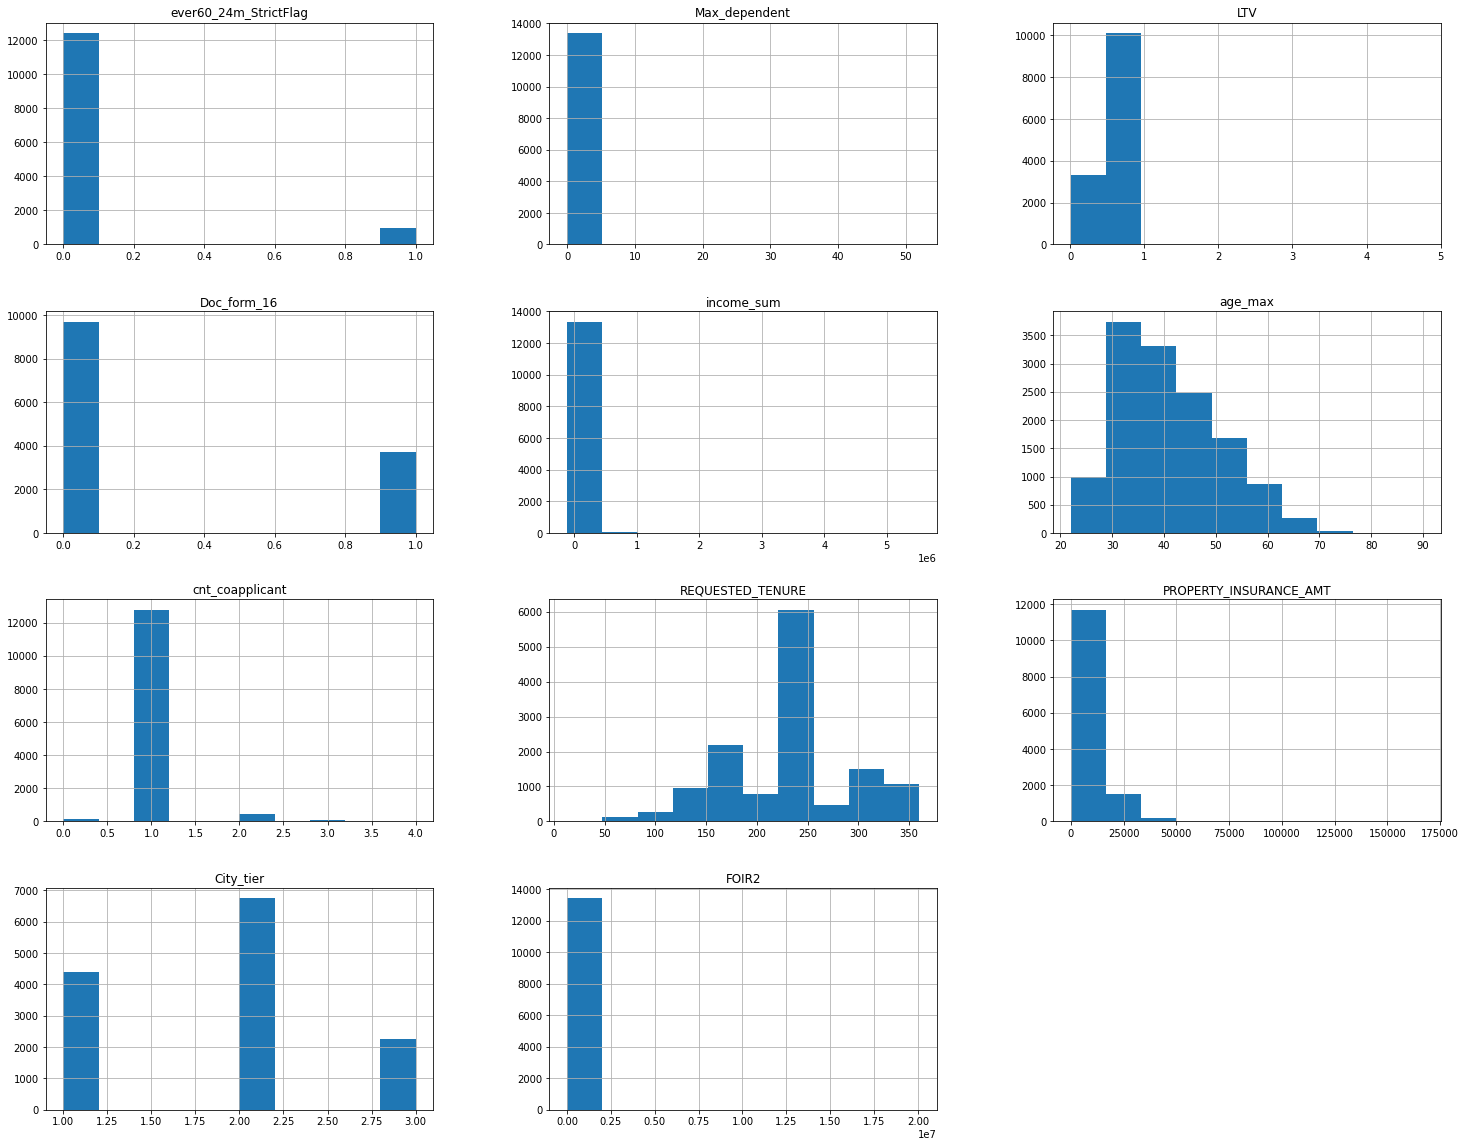

In [18]:
#To check the data distribution

raw_df.hist(figsize = (25,20))
plt.show()

In [19]:
#value count for target variable
raw_df["ever60_24m_StrictFlag"].value_counts() #(we can see only a small portion or target variable consists of people who defauls on loans)

0    12429
1      980
Name: ever60_24m_StrictFlag, dtype: int64

In [20]:
# Ml model need the values to be of type numeric. So, we replace the values with 1 and 0 based on condition\n",
raw_df['SALARIED_SELF'] = np.where(raw_df['SALARIED_SELF'] == 'SALARIED',1,0)


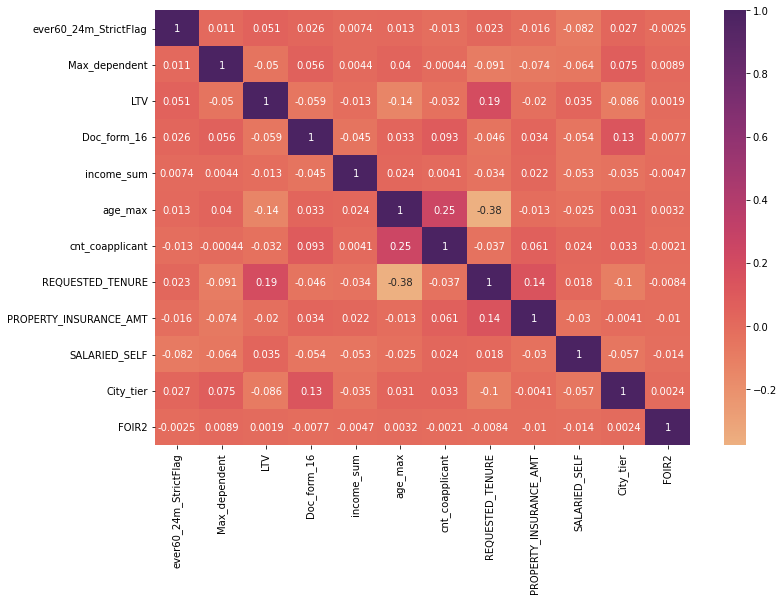

In [21]:
#Correlation plot

fig,ax=plt.subplots(figsize=(12,8))
corr_matrix=raw_df.corr()
corr_heatmap=sns.heatmap(corr_matrix,cmap="flare",annot=True)
plt.show()

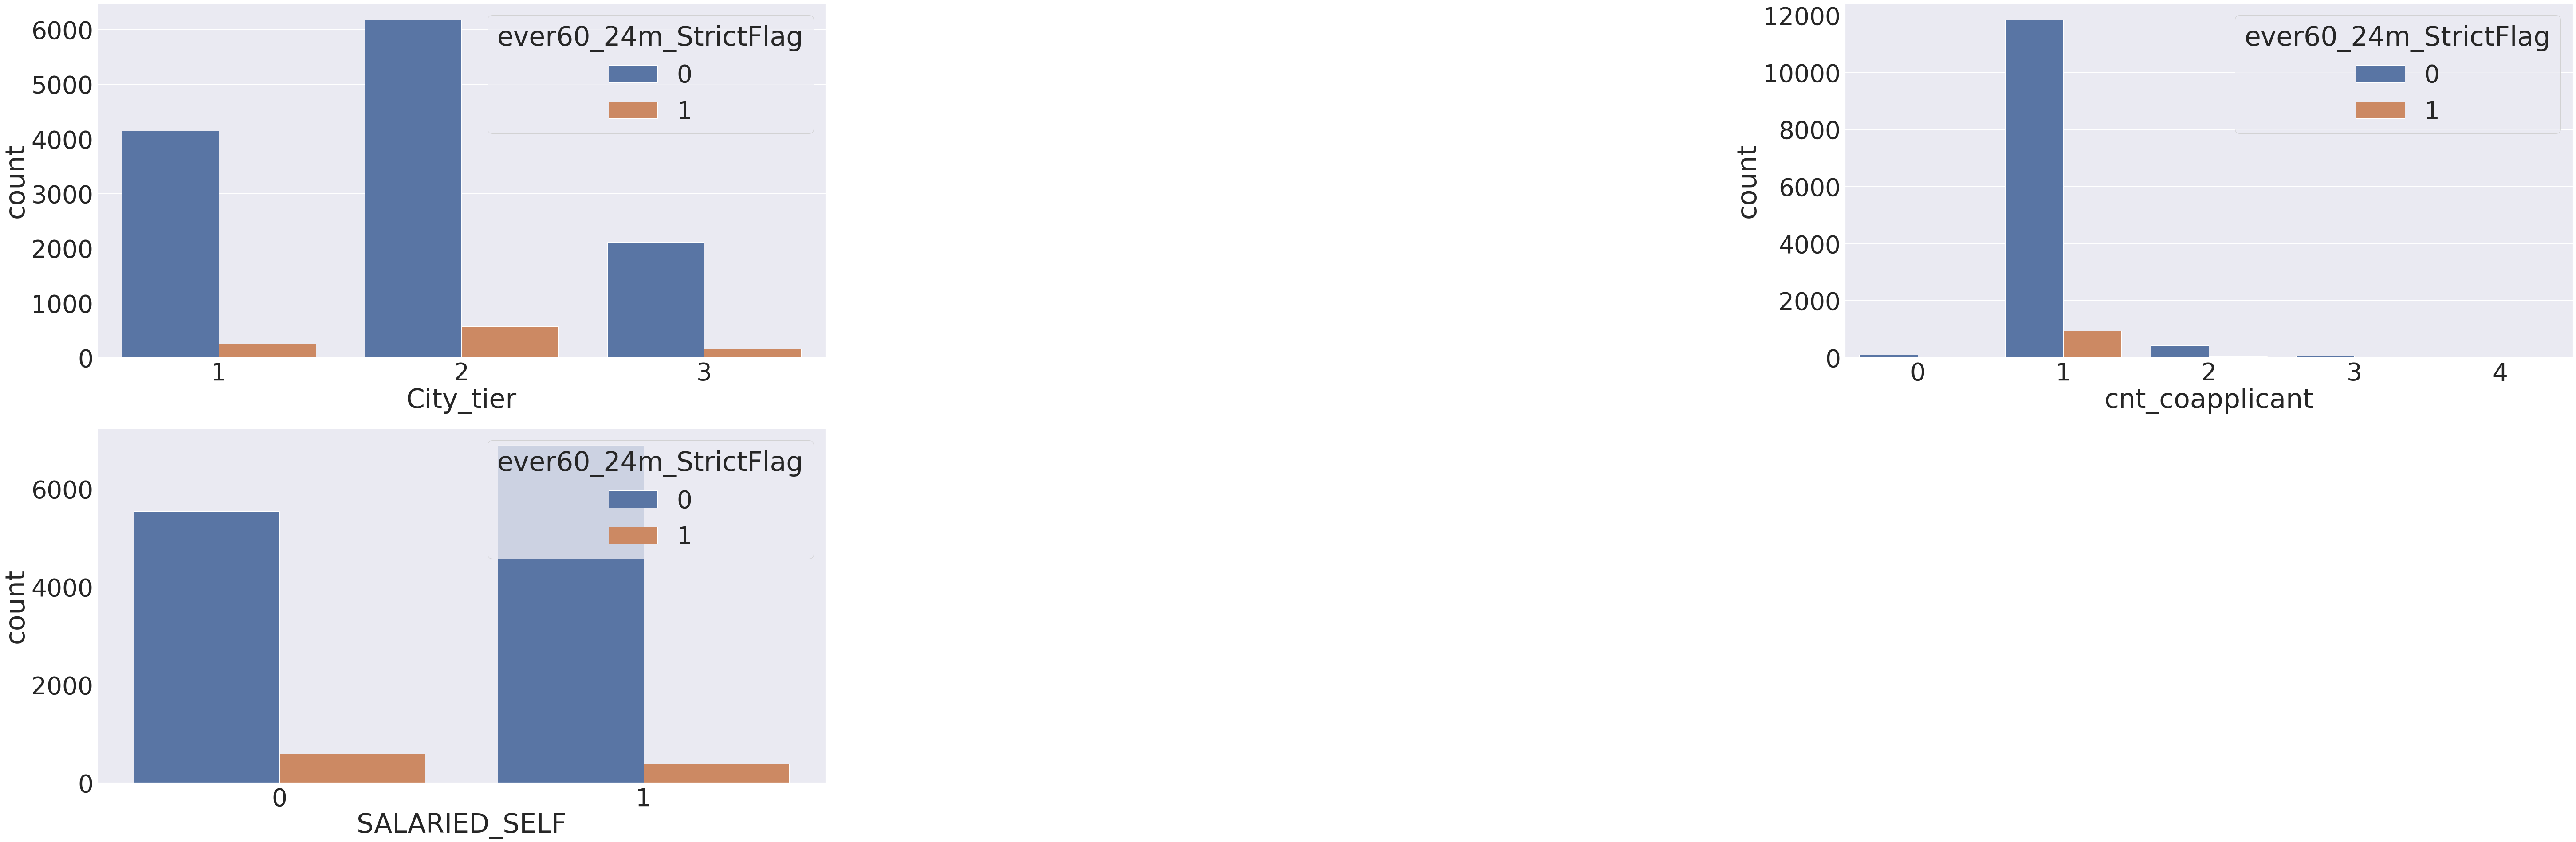

In [25]:
#plotting graphs
# application status by city
plt.figure(figsize=(100,50))
sns.set(font_scale=5)
plt.subplot(331)
sns.countplot(raw_df['City_tier'], hue=raw_df['ever60_24m_StrictFlag'])

#application status by cnt_coapplicant
plt.subplot(333)
sns.countplot(raw_df['cnt_coapplicant'], hue=raw_df['ever60_24m_StrictFlag'])

#application status bu salaried self
plt.subplot(334)
sns.countplot(raw_df['SALARIED_SELF'], hue=raw_df['ever60_24m_StrictFlag'])

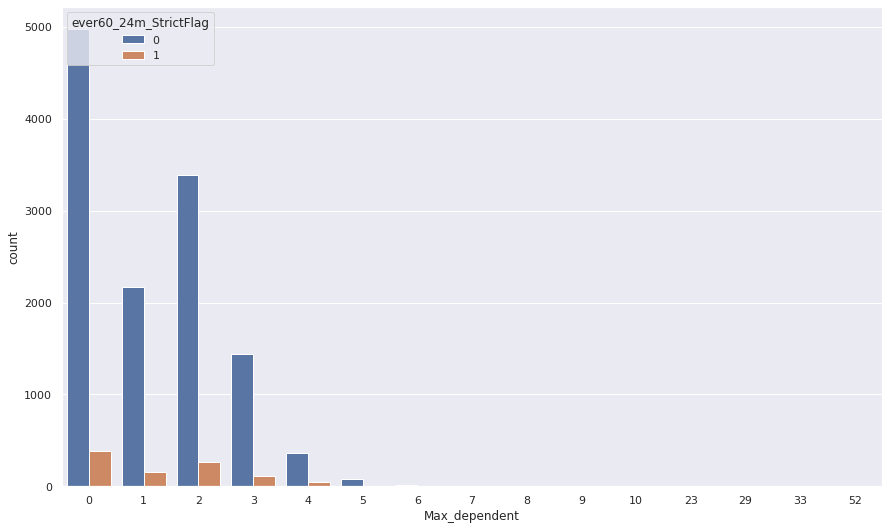

In [26]:
#application status by max dependents
plt.figure(figsize=(50,30))
sns.set(font_scale=1)
plt.subplot(334)
sns.countplot(raw_df['Max_dependent'], hue=raw_df['ever60_24m_StrictFlag'])
   

In [27]:
#independent and dependent variables
X = raw_df.iloc[:4609, 1:12].values
y = raw_df.iloc[:4609, 0].values

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [29]:
#splitting the dataset into training set and testing set\n",
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [30]:
#TO know the shape/dimensions of the datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3226, 11)
(1383, 11)
(3226,)
(1383,)


In [31]:
# logistic model creation
model = LogisticRegression()

In [32]:
#fit the model with x-train and y-train datasets
model.fit(X_train,y_train)

LogisticRegression()

In [33]:
#predicting the values for x-test
reg_pred = model.predict(X_test)

In [35]:
# metrics.accuracy_score() is used to calculate the accuracy of model prediction
print('Accuracy using LogisticRgression: ', metrics.accuracy_score(reg_pred,y_test))

Accuracy using LogisticRgression:  0.9436008676789588


In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve, roc_auc_score

In [37]:
# Creating the Confusion Matrix
confusion_matrx = confusion_matrix(y_test,reg_pred)
confusion_matrx

array([[1305,    0],
       [  78,    0]])

In [38]:
# Calculating the Accuracy using actual y value in test data to the predicted  value
accuracy = accuracy_score(y_test,reg_pred)
accuracy

0.9436008676789588

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test,reg_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1305
           1       0.00      0.00      0.00        78

    accuracy                           0.94      1383
   macro avg       0.47      0.50      0.49      1383
weighted avg       0.89      0.94      0.92      1383



In [41]:
auc = roc_auc_score(y_test,reg_pred)
auc

0.5

<function matplotlib.pyplot.show>

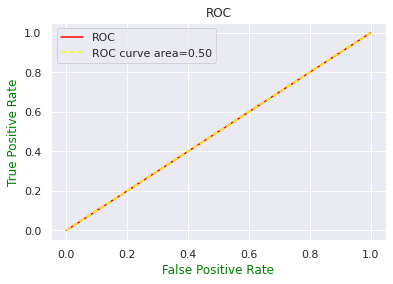

In [42]:
# Plotting the ROC
fpr,tpr,thresholds = roc_curve(y_test,reg_pred)
plt.plot(fpr,tpr,color='red',label='ROC')
plt.plot([0,1],[0,1],color='yellow',linestyle='--',label='ROC curve area=%0.2f'%auc)
plt.xlabel('False Positive Rate',c='green')
plt.ylabel('True Positive Rate',c='green')
plt.title('ROC')
plt.legend()
plt.show